Import module and Libraries


In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from memory_profiler import profile

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV


%matplotlib inline

c:\Users\User\anaco\envs\pymix\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Import dataset


In [2]:
df_test = pd.read_csv('incomes_datasets/test.csv')
df_train = pd.read_csv('incomes_datasets/train.csv')

EDA


In [3]:
df_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [4]:
df_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


<AxesSubplot:xlabel='educational-num'>

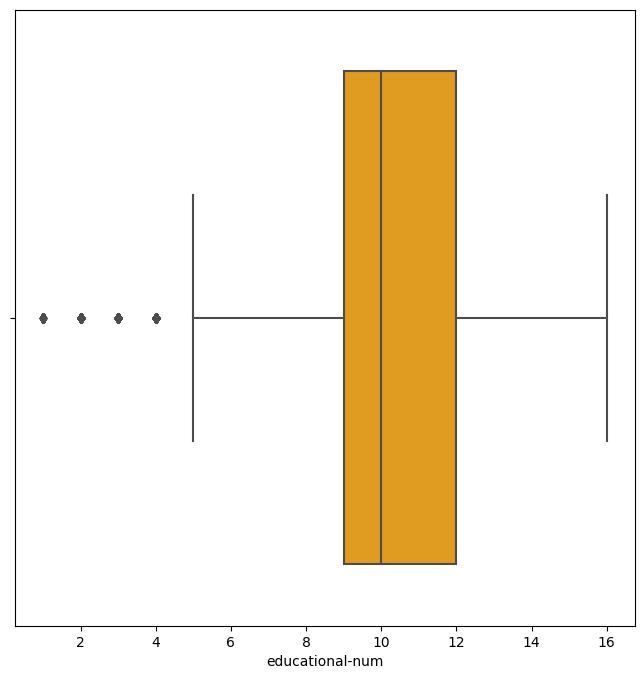

In [6]:
fig,ax = plt.subplots(figsize = (8,8))
sns.boxplot(data=df_train,x='educational-num',color='orange')

In [7]:
df_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [8]:
#change dataframe to numerical 
def columns_encoder(dataframe):
    type_obj_columns_= [x for x in dataframe.columns if dataframe[x].dtype != 'int64']

    for i in type_obj_columns_:
        dataframe[i] = LabelEncoder().fit_transform(dataframe[i])
    return dataframe

#noramlize function
def columns_normalize(dataframe,type):
    #normalization df
    if type == 'absmax':
        for c in dataframe.columns:
	        dataframe[c] = dataframe[c] / (dataframe[c].abs().max())
    elif type == 'minmax':
        for c in dataframe.columns:
            dataframe[c] = (dataframe[c] - dataframe[c].min()) / (dataframe[c].max() - dataframe[c].min())
    return dataframe 

In [9]:
columns_encoder(dataframe=df_train)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,3,366425,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,3,244602,2,8,4,7,3,4,1,0,0,15,38,0
2,31,3,174201,9,13,2,3,0,4,1,0,0,40,38,1
3,58,6,110199,5,4,2,13,0,4,1,0,0,40,38,0
4,25,6,149248,15,10,4,7,1,2,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,3,68982,9,13,2,3,0,4,1,0,0,50,38,1
43953,19,3,116562,11,9,4,7,3,4,0,0,0,40,38,0
43954,30,3,197947,15,10,0,11,1,4,1,0,0,58,38,0
43955,46,3,97883,9,13,4,11,1,4,0,0,0,35,38,0


In [10]:
columns_normalize(dataframe=df_train,type = 'minmax')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,0.684932,0.375,0.238967,0.666667,1.000000,0.000000,0.214286,0.2,1.0,1.0,1.0,0.0,0.602041,0.926829,1.0
1,0.000000,0.375,0.156482,0.133333,0.466667,0.666667,0.500000,0.6,1.0,1.0,0.0,0.0,0.142857,0.926829,0.0
2,0.191781,0.375,0.108814,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.397959,0.926829,1.0
3,0.561644,0.750,0.065479,0.333333,0.200000,0.333333,0.928571,0.0,1.0,1.0,0.0,0.0,0.397959,0.926829,0.0
4,0.109589,0.750,0.091919,1.000000,0.600000,0.666667,0.500000,0.2,0.5,1.0,0.0,0.0,0.397959,0.926829,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.479452,0.375,0.037572,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.500000,0.926829,1.0
43953,0.027397,0.375,0.069788,0.733333,0.533333,0.666667,0.500000,0.6,1.0,0.0,0.0,0.0,0.397959,0.926829,0.0
43954,0.178082,0.375,0.124893,1.000000,0.600000,0.000000,0.785714,0.2,1.0,1.0,0.0,0.0,0.581633,0.926829,0.0
43955,0.397260,0.375,0.057140,0.600000,0.800000,0.666667,0.785714,0.2,1.0,0.0,0.0,0.0,0.346939,0.926829,0.0


In [11]:
df_train = df_train.fillna(0)
df_train.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 0) 

NameError: name 'df' is not defined

In [ ]:
#pretrain dataset
x_train = df_train.drop(columns=['income_>50K'])
y_train = df_train['income_>50K'].astype('int32')

x_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.684932,0.375,0.238967,0.666667,1.000000,0.000000,0.214286,0.2,1.0,1.0,1.0,0.0,0.602041,0.926829
1,0.000000,0.375,0.156482,0.133333,0.466667,0.666667,0.500000,0.6,1.0,1.0,0.0,0.0,0.142857,0.926829
2,0.191781,0.375,0.108814,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.397959,0.926829
3,0.561644,0.750,0.065479,0.333333,0.200000,0.333333,0.928571,0.0,1.0,1.0,0.0,0.0,0.397959,0.926829
4,0.109589,0.750,0.091919,1.000000,0.600000,0.666667,0.500000,0.2,0.5,1.0,0.0,0.0,0.397959,0.926829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,0.479452,0.375,0.037572,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.500000,0.926829
43953,0.027397,0.375,0.069788,0.733333,0.533333,0.666667,0.500000,0.6,1.0,0.0,0.0,0.0,0.397959,0.926829
43954,0.178082,0.375,0.124893,1.000000,0.600000,0.000000,0.785714,0.2,1.0,1.0,0.0,0.0,0.581633,0.926829
43955,0.397260,0.375,0.057140,0.600000,0.800000,0.666667,0.785714,0.2,1.0,0.0,0.0,0.0,0.346939,0.926829


In [ ]:
y_train

0        1
1        0
2        1
3        0
4        0
        ..
43952    1
43953    0
43954    0
43955    0
43956    0
Name: income_>50K, Length: 43957, dtype: int32

In [ ]:
#kfold n = 5
kfold = StratifiedKFold(n_splits=5)

def cross_validate_score_(model,kfold,model_name):
    #evaluate scoreing
    evaluate_method = ['accuracy','f1','recall','precision']
    evaluate_list = []
    for ev in evaluate_method:       
        cv_score = cross_val_score(estimator=model,
                                        X=x_train,
                                        y=y_train,
                                        cv=kfold,
                                        n_jobs=4,
                                        scoring=ev)
        evaluate_list.append(cv_score)
    print(evaluate_list)
    df_cv = pd.DataFrame({
        'Model': model_name,
        'Accuracy' : evaluate_list[0],
        'F1 Score' : evaluate_list[1],
        'Recall': evaluate_list[2],
        'Precision' :  evaluate_list[3],
    },index=[int(n) for n in range(1,6)])
    
    return df_cv

cross_validate_score_(model=LogisticRegression(),kfold=kfold,model_name='Logistic Regression')

[array([0.82529572, 0.8249545 , 0.82584461, 0.821067  , 0.82425208]), array([0.55426582, 0.5466863 , 0.55661743, 0.53748897, 0.54276413]), array([0.45389734, 0.44106464, 0.45674905, 0.43461721, 0.43604375]), array([0.71162444, 0.71882262, 0.71237954, 0.70416025, 0.71865204])]


,Model,Accuracy,F1 Score,Recall,Precision
1,Logistic Regression,0.825296,0.554266,0.453897,0.711624
2,Logistic Regression,0.824955,0.546686,0.441065,0.718823
3,Logistic Regression,0.825845,0.556617,0.456749,0.712380
4,Logistic Regression,0.821067,0.537489,0.434617,0.704160
5,Logistic Regression,0.824252,0.542764,0.436044,0.718652


In [ ]:
cross_validate_score_(model=KNeighborsClassifier(),kfold=kfold,model_name='KNN')

[array([0.82347589, 0.82518198, 0.82265954, 0.82573086, 0.82766466]), array([0.6121939 , 0.60680481, 0.60621369, 0.6077829 , 0.61282903]), array([0.58222433, 0.56368821, 0.57034221, 0.56443176, 0.5701379 ]), array([0.64541623, 0.65706371, 0.64690027, 0.6583472 , 0.66243094])]


,Model,Accuracy,F1 Score,Recall,Precision
1,KNN,0.823476,0.612194,0.582224,0.645416
2,KNN,0.825182,0.606805,0.563688,0.657064
3,KNN,0.822660,0.606214,0.570342,0.646900
4,KNN,0.825731,0.607783,0.564432,0.658347
5,KNN,0.827665,0.612829,0.570138,0.662431


In [ ]:
#Logistic Regression
lrr = LogisticRegression(max_iter=1000)

#Search grid for optimal parameters
lrr_params_grid ={"C":np.logspace(-3,3,7), 
      "penalty":['l2']}

gsLRR =GridSearchCV(lrr,param_grid=lrr_params_grid,cv=kfold)

gsLRR.fit(x_train,y_train)

LRR_best = gsLRR.best_estimator_

# Best score
gsLRR.best_score_

0.8255340477154804

In [ ]:
KNN = KNeighborsClassifier()

#Search grid for optimal parameters
KNN_params_grid = {'n_neighbors':[6,8,10,12,14,16,18,20],
         'leaf_size':list(range(1,50,5))}

gsKNN = GridSearchCV(KNN, param_grid= KNN_params_grid, cv = kfold,scoring = "accuracy",verbose=1)

gsKNN.fit(x_train,y_train)

KNN_best = gsKNN.best_estimator_

# Best score
gsKNN.best_score_


Fitting 5 folds for each of 80 candidates, totalling 400 fits


0.835407438060412

In [ ]:
gsKNN.best_params_

{'leaf_size': 1, 'n_neighbors': 18}